In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as sk

In [3]:
housing_data = pd.read_csv('/Users/peytonbailey/WGU Data Science Masters/D600- Statistical Data Mining/Task 1/D600 Task 1 Dataset 1 Housing Information.csv')
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
housing_data.head()

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,"255,614.90",566.62,1.00,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,"181,861.54",0
1,5009,"155,586.09","1,472.34",1.00,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,"50,042.60",0
2,4450,"131,050.83",550.00,1.78,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,"48,400.34",0
3,1070,"151,361.71",941.81,2.04,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,"84,594.12",0
4,400,"113,167.61",550.00,1.06,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,"22,934.60",0


In [5]:
housing_data['PreviousSalePrice'].describe()

count       7,000.00
mean      284,509.35
std       185,734.02
min        -8,356.90
25%       142,013.98
50%       262,183.13
75%       396,121.17
max     1,296,606.69
Name: PreviousSalePrice, dtype: float64

In [6]:
housing_data = housing_data[housing_data['PreviousSalePrice'] >= 0].reset_index(drop=True)


In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6972 entries, 0 to 6971
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    6972 non-null   int64  
 1   Price                 6972 non-null   float64
 2   SquareFootage         6972 non-null   float64
 3   NumBathrooms          6972 non-null   float64
 4   NumBedrooms           6972 non-null   int64  
 5   BackyardSpace         6972 non-null   float64
 6   CrimeRate             6972 non-null   float64
 7   SchoolRating          6972 non-null   float64
 8   AgeOfHome             6972 non-null   float64
 9   DistanceToCityCenter  6972 non-null   float64
 10  EmploymentRate        6972 non-null   float64
 11  PropertyTaxRate       6972 non-null   float64
 12  RenovationQuality     6972 non-null   float64
 13  LocalAmenities        6972 non-null   float64
 14  TransportAccess       6972 non-null   float64
 15  Fireplace            

In [8]:
X = housing_data[['SquareFootage','BackyardSpace','SchoolRating','CrimeRate','AgeOfHome','RenovationQuality','PreviousSalePrice','LocalAmenities']]
y = housing_data['Price']

In [9]:
from sklearn.preprocessing import StandardScaler
scaleStandard = StandardScaler()

In [10]:
X_scaled = scaleStandard.fit_transform(X)


In [11]:
X_scaled = pd.DataFrame(X_scaled, columns =['SquareFootage','BackyardSpace','SchoolRating','CrimeRate','AgeOfHome','RenovationQuality','PreviousSalePrice','LocalAmenities'])

In [12]:
X_scaled.head()

,SquareFootage,BackyardSpace,SchoolRating,CrimeRate,AgeOfHome,RenovationQuality,PreviousSalePrice,LocalAmenities
0,-1.14,0.96,-0.70,-0.59,-0.23,-0.04,-0.56,-0.56
1,0.99,0.52,-0.70,-0.87,-0.20,-0.47,-1.27,-0.14
2,-1.17,0.87,1.19,-1.04,0.05,-0.38,-1.28,0.80
3,-0.26,-0.26,0.07,-0.50,1.50,-0.28,-1.09,-0.35
4,-1.17,-0.57,-0.54,-1.27,-0.95,-0.84,-1.42,-0.18


In [13]:
X_scaled.describe().round(3)

,SquareFootage,BackyardSpace,SchoolRating,CrimeRate,AgeOfHome,RenovationQuality,PreviousSalePrice,LocalAmenities
count,"6,972.00","6,972.00","6,972.00","6,972.00","6,972.00","6,972.00","6,972.00","6,972.00"
mean,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.18,-1.82,-3.56,-1.73,-1.47,-2.54,-1.54,-2.23
25%,-0.91,-0.75,-0.68,-0.77,-0.82,-0.68,-0.77,-0.73
50%,-0.12,-0.06,0.03,-0.05,-0.13,0.01,-0.12,0.04
75%,0.69,0.69,0.75,0.69,0.64,0.69,0.60,0.80
max,4.28,4.00,1.62,3.80,4.15,2.53,5.46,1.53


In [14]:
X_scaled.to_csv('/Users/peytonbailey/WGU Data Science Masters/D600- Statistical Data Mining/Task 3/X_scaled.csv', index=False)

In [15]:
#D3
X.describe()

,SquareFootage,BackyardSpace,SchoolRating,CrimeRate,AgeOfHome,RenovationQuality,PreviousSalePrice,LocalAmenities
count,"6,972.00","6,972.00","6,972.00","6,972.00","6,972.00","6,972.00","6,972.00","6,972.00"
mean,"1,050.46",511.38,6.95,31.24,46.85,5.01,"285,664.88",5.93
std,425.99,280.15,1.89,18.03,31.79,1.97,"185,207.47",2.66
min,550.00,0.39,0.22,0.03,0.01,0.01,22.80,0.00
25%,663.04,300.72,5.66,17.40,20.81,3.67,"142,929.55",4.00
50%,999.67,495.92,7.01,30.39,42.69,5.03,"262,872.06",6.04
75%,"1,344.09",704.20,8.37,43.67,67.25,6.36,"396,922.51",8.05
max,"2,874.70","1,631.36",10.00,99.73,178.68,10.00,"1,296,606.69",10.00


In [16]:
print(X.BackyardSpace.describe())
print(X.SchoolRating.describe())
print(X.CrimeRate.describe())

count   6,972.00
mean      511.38
std       280.15
min         0.39
25%       300.72
50%       495.92
75%       704.20
max     1,631.36
Name: BackyardSpace, dtype: float64
count   6,972.00
mean        6.95
std         1.89
min         0.22
25%         5.66
50%         7.01
75%         8.37
max        10.00
Name: SchoolRating, dtype: float64
count   6,972.00
mean       31.24
std        18.03
min         0.03
25%        17.40
50%        30.39
75%        43.67
max        99.73
Name: CrimeRate, dtype: float64


In [17]:
print(X.AgeOfHome.describe())
print(X.RenovationQuality.describe())
print(X.PreviousSalePrice.describe())

count   6,972.00
mean       46.85
std        31.79
min         0.01
25%        20.81
50%        42.69
75%        67.25
max       178.68
Name: AgeOfHome, dtype: float64
count   6,972.00
mean        5.01
std         1.97
min         0.01
25%         3.67
50%         5.03
75%         6.36
max        10.00
Name: RenovationQuality, dtype: float64
count       6,972.00
mean      285,664.88
std       185,207.47
min            22.80
25%       142,929.55
50%       262,872.06
75%       396,922.51
max     1,296,606.69
Name: PreviousSalePrice, dtype: float64


In [18]:
print(X.LocalAmenities.describe())
print(y.describe())

count   6,972.00
mean        5.93
std         2.66
min         0.00
25%         4.00
50%         6.04
75%         8.05
max        10.00
Name: LocalAmenities, dtype: float64
count       6,972.00
mean      308,119.47
std       149,890.38
min        85,000.00
25%       192,851.43
50%       280,477.46
75%       392,435.11
max     1,046,675.64
Name: Price, dtype: float64


In [19]:
X_scaled.shape
print(X_scaled)

      SquareFootage  BackyardSpace  SchoolRating  CrimeRate  AgeOfHome  \
0             -1.14           0.96         -0.70      -0.59      -0.23   
1              0.99           0.52         -0.70      -0.87      -0.20   
2             -1.17           0.87          1.19      -1.04       0.05   
3             -0.26          -0.26          0.07      -0.50       1.50   
4             -1.17          -0.57         -0.54      -1.27      -0.95   
...             ...            ...           ...        ...        ...   
6967          -1.17           1.36          0.54      -1.07      -0.59   
6968           1.59           1.54         -0.60       0.16       1.37   
6969          -0.06          -1.29          0.99      -1.73      -0.47   
6970           2.74           0.06          1.19      -1.11      -1.00   
6971           1.18           1.19          1.62      -0.69      -0.65   

      RenovationQuality  PreviousSalePrice  LocalAmenities  
0                 -0.04              -0.56        

In [20]:
print(y)

0      255,614.90
1      155,586.09
2      131,050.83
3      151,361.71
4      113,167.61
          ...    
6967   307,821.18
6968   421,368.89
6969   473,382.53
6970   343,397.98
6971   438,060.82
Name: Price, Length: 6972, dtype: float64


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_trans = pca.fit_transform(X_scaled)
print(pca_trans)
print(pca_trans.shape)


[[-1.00523518 -1.07580921  0.60141272 ...  0.29032405  0.72583876
   0.26237584]
 [-0.57368222 -0.70753169  0.34171908 ... -1.09402484 -0.09725481
  -1.36692097]
 [-0.43104953 -2.06152059  0.11385481 ...  1.08947421 -0.76939723
  -0.35413478]
 ...
 [ 0.96249584 -1.27210725 -1.79522874 ... -0.39472282 -0.37058378
   0.31656745]
 [ 2.55354755 -0.37736719 -0.21135346 ... -1.62334459 -1.38505404
  -0.91284389]
 [ 3.15272211 -0.55041382  0.44090305 ...  0.55118712  0.19633736
  -0.37649705]]
(6972, 8)


In [22]:
loadings = pca.components_
print(loadings)
print(loadings.shape)



[[ 0.44048017  0.11464204  0.44105082 -0.14118304 -0.16666391  0.49123103
   0.51504784  0.20980202]
 [ 0.34554822 -0.26833246 -0.13248849  0.73971552  0.36014453  0.06654491
   0.230435   -0.23796907]
 [ 0.0511979   0.82294217 -0.25067977  0.40660518 -0.2136615  -0.05413449
  -0.00319195  0.20829033]
 [ 0.1237519   0.47085873  0.06052865 -0.35039653  0.64742942  0.01581489
   0.0254189  -0.46526873]
 [-0.10984758 -0.03452783 -0.01464699  0.00299171  0.61021193  0.05582737
  -0.05832619  0.77951306]
 [-0.55346589  0.11001419  0.58323179  0.36188103  0.05781058  0.36752397
  -0.22142284 -0.15169437]
 [-0.23245679 -0.04630452 -0.61386129 -0.1174558  -0.010617    0.73779801
   0.0313408  -0.08807568]
 [-0.54425247  0.02176529 -0.06494138 -0.00448303  0.04346928 -0.26181431
   0.79218487 -0.03293728]]
(8, 8)


In [23]:
loadings_df = pd.DataFrame(loadings, 
                           index=X_scaled.columns, 
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)])

In [24]:
print(loadings_df)

                    PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8
SquareFootage      0.44  0.11  0.44 -0.14 -0.17  0.49  0.52  0.21
BackyardSpace      0.35 -0.27 -0.13  0.74  0.36  0.07  0.23 -0.24
SchoolRating       0.05  0.82 -0.25  0.41 -0.21 -0.05 -0.00  0.21
CrimeRate          0.12  0.47  0.06 -0.35  0.65  0.02  0.03 -0.47
AgeOfHome         -0.11 -0.03 -0.01  0.00  0.61  0.06 -0.06  0.78
RenovationQuality -0.55  0.11  0.58  0.36  0.06  0.37 -0.22 -0.15
PreviousSalePrice -0.23 -0.05 -0.61 -0.12 -0.01  0.74  0.03 -0.09
LocalAmenities    -0.54  0.02 -0.06 -0.00  0.04 -0.26  0.79 -0.03


In [25]:
prop_var = pca.explained_variance_ratio_
print(prop_var)

[0.3139911  0.12948039 0.12302971 0.1210933  0.11470217 0.09057184
 0.0595469  0.04758459]


In [26]:
PC_number = np.arange(pca.n_components_) + 1
print(PC_number)

[1 2 3 4 5 6 7 8]


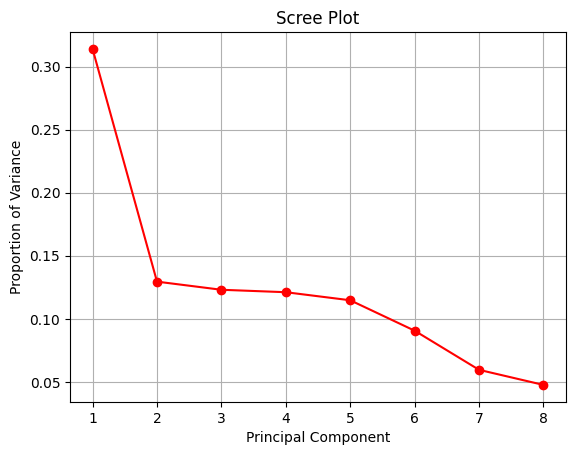

In [27]:
plt.figure
plt.plot(PC_number, prop_var, 'ro-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.grid()
plt.show()
 

In [28]:
var = pca.explained_variance_
print(var)

[2.51228914 1.0359917  0.98437888 0.96888537 0.917749   0.72467866
 0.47644353 0.38073132]


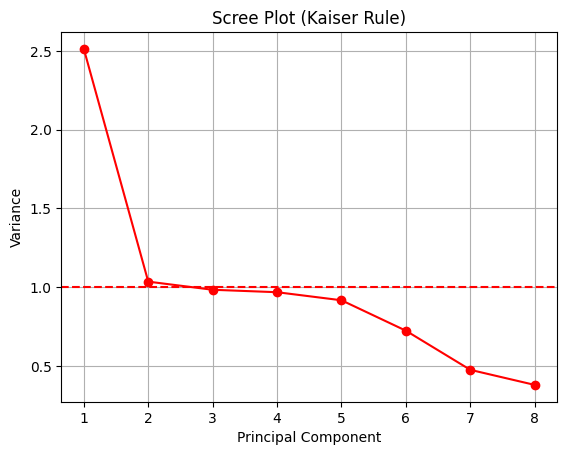

In [29]:
plt.figure
plt.plot(PC_number, var, 'ro-')
plt.title('Scree Plot (Kaiser Rule)')
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.axhline (y = 1, color = 'red', linestyle = '--')
plt.grid()
plt.show()

In [30]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
print(X_pca)
print(X_pca.shape)
print(y.shape)

[[-1.00523518 -1.07580921  0.60141272  0.57111881]
 [-0.57368222 -0.70753169  0.34171908  0.52367493]
 [-0.43104953 -2.06152059  0.11385481  0.31880472]
 ...
 [ 0.96249584 -1.27210725 -1.79522874 -0.51368409]
 [ 2.55354755 -0.37736719 -0.21135346 -0.1006039 ]
 [ 3.15272211 -0.55041382  0.44090305  0.55331142]]
(6972, 4)
(6972,)


In [31]:
X_pca = pd.DataFrame(X_pca, 
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print(X_pca)

       PC1   PC2   PC3   PC4
0    -1.01 -1.08  0.60  0.57
1    -0.57 -0.71  0.34  0.52
2    -0.43 -2.06  0.11  0.32
3    -1.06 -0.04 -0.82  1.13
4    -1.66 -1.81 -0.69 -0.58
...    ...   ...   ...   ...
6967 -0.23 -1.72  0.45  0.89
6968  1.29  0.73  1.56  1.06
6969  0.96 -1.27 -1.80 -0.51
6970  2.55 -0.38 -0.21 -0.10
6971  3.15 -0.55  0.44  0.55

[6972 rows x 4 columns]


In [32]:
from sklearn.model_selection import train_test_split

# Split the dataset with a larger percentage for training
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42)


In [33]:
X_pca

,PC1,PC2,PC3,PC4
0,-1.01,-1.08,0.60,0.57
1,-0.57,-0.71,0.34,0.52
2,-0.43,-2.06,0.11,0.32
3,-1.06,-0.04,-0.82,1.13
4,-1.66,-1.81,-0.69,-0.58
...,...,...,...,...
6967,-0.23,-1.72,0.45,0.89
6968,1.29,0.73,1.56,1.06
6969,0.96,-1.27,-1.80,-0.51
6970,2.55,-0.38,-0.21,-0.10


In [34]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
train_df.to_csv('/Users/peytonbailey/WGU Data Science Masters/D600- Statistical Data Mining/Task 3/training_data.csv', index=False)
test_df.to_csv('/Users/peytonbailey/WGU Data Science Masters/D600- Statistical Data Mining/Task 3/testing_data.csv', index=False)

In [35]:
import statsmodels.api as sm

In [36]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print("=== Initial Model w/ PCA ===")
print(model.summary())

=== Initial Model w/ PCA ===
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     1778.
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        14:19:00   Log-Likelihood:                -72112.
No. Observations:                5577   AIC:                         1.442e+05
Df Residuals:                    5572   BIC:                         1.443e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.087e+05  

In [37]:
def backward_elimination_with_vif(X, y, vif_threshold=10, p_threshold=0.05):
    features = X.columns.tolist()
    
    while True:
        if not features:  # Exit if no features remain
            break
        
        # Calculate VIF for features BEFORE adding constant
        vif = pd.DataFrame()
        vif["Variable"] = features
        vif["VIF"] = [variance_inflation_factor(X[features].values, i) for i in range(len(features))]
        
        # Only add constant for model fitting AFTER VIF calculation
        X_const = sm.add_constant(X[features])
        model = sm.OLS(y, X_const).fit()
        
        # Remove feature with highest VIF if it exceeds threshold
        max_vif = vif["VIF"].max()
        if max_vif > vif_threshold:
            max_vif_row = vif.loc[vif['VIF'].idxmax()]
            removed_feature = max_vif_row['Variable']
            features.remove(removed_feature)
            print(f'Removed "{removed_feature}" (VIF: {max_vif:.2f})')
            continue  # Restart loop to recalculate VIF with updated features
        
        # If no high-VIF features, check p-values (excluding intercept)
        p_values = model.pvalues.iloc[1:]  # Skip intercept's p-value
        max_p = p_values.max()
        
        if max_p > p_threshold:
            removed_feature = p_values.idxmax()
            features.remove(removed_feature)
            print(f'Removed "{removed_feature}" (p-value: {max_p:.4f})')
        else:
            break  # Exit when all features are significant
    
    return features

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
optimal_features = backward_elimination_with_vif(X_train, y_train)

Removed "PC3" (p-value: 0.9101)
Removed "PC4" (p-value: 0.2347)


In [40]:
# Final model
X_train_final = sm.add_constant(X_train[optimal_features])
final_model = sm.OLS(y_train, X_train_final).fit()

print("\n=== Final Model Summary ===")
print(final_model.summary())


=== Final Model Summary ===
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     3555.
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        14:19:00   Log-Likelihood:                -72112.
No. Observations:                5577   AIC:                         1.442e+05
Df Residuals:                    5574   BIC:                         1.443e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.087e+05  

In [41]:
coefficients = final_model.params

# Print regression equation
equation = "Price = "
for i, coef in enumerate(coefficients):
    if i == 0:  # Intercept
        equation += f"{coef:.2f} + "
    else:
        equation += f"{coef:.2f}*{coefficients.index[i]} + "
equation = equation.rstrip(" + ")
print("\n=== Multiple Linear Regression Equation ===")
print(equation)


=== Multiple Linear Regression Equation ===
Price = 308739.60 + 68557.83*PC1 + 29081.13*PC2


In [42]:
from sklearn.metrics import mean_squared_error

# Generate predictions for the training set
y_train_pred = final_model.predict(X_train_final)

# Calculate MSE using sklearn
mse_train = mean_squared_error(y_train, y_train_pred)

# Print MSE
print(f"Mean Squared Error on Training Set: {mse_train:.4f}")


Mean Squared Error on Training Set: 9968972085.3838


In [43]:
optimal_features = ['PC1', 'PC2']
print(optimal_features)

['PC1', 'PC2']


In [44]:
# Correct order:
X_test_final = X_test[optimal_features]  
X_test_final = sm.add_constant(X_test_final)




# Generate predictions using the optimized model
y_pred = final_model.predict(X_test_final)

mse_test = mean_squared_error(y_test, y_pred)
# Print predictions
print("\n=== Predictions on Test Data ===")
print(y_pred)
print(f"Mean Squared Error on Test Set: {mse_test:.4f}")


=== Predictions on Test Data ===
132    219,191.84
5571   410,283.58
2168   209,277.21
4086   218,320.47
4787   517,618.31
          ...    
3240   183,367.77
3614   346,828.74
5105   337,894.24
691    286,392.54
533    307,958.96
Length: 1395, dtype: float64
Mean Squared Error on Test Set: 9580565184.8850


In [45]:
(mse_test - mse_train) / mse_train

-0.03896157970671721